In [1]:
from pathlib import Path
from glob import glob
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [7]:
root_path = Path('/home/sonujha/personal/ISIC-2024---Skin-Cancer-Detection-with-3D-TBP/data')

In [8]:
images = list(root_path.glob('train-image/image/*'))
len(images)

401059

(135, 135)


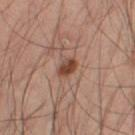

In [9]:
import random
img_path = random.choice(images)
img = Image.open(img_path)
print(img.size)
img

In [10]:
train_df = pd.read_csv(root_path/'train-metadata.csv')

/tmp/ipykernel_439150/74566934.py:1: DtypeWarning: Columns (51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv(root_path/'train-metadata.csv')


In [11]:
print(train_df.shape) # num of image == num of rows in df
train_df.head()

(401059, 55)


,isic_id,target,patient_id,age_approx,sex,anatom_site_general,clin_size_long_diam_mm,image_type,tbp_tile_type,tbp_lv_A,...,lesion_id,iddx_full,iddx_1,iddx_2,iddx_3,iddx_4,iddx_5,mel_mitotic_index,mel_thick_mm,tbp_lv_dnn_lesion_confidence
0,ISIC_0015670,0,IP_1235828,60.0,male,lower extremity,3.04,TBP tile: close-up,3D: white,20.244422,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,97.517282
1,ISIC_0015845,0,IP_8170065,60.0,male,head/neck,1.10,TBP tile: close-up,3D: white,31.712570,...,IL_6727506,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,3.141455
2,ISIC_0015864,0,IP_6724798,60.0,male,posterior torso,3.40,TBP tile: close-up,3D: XP,22.575830,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,99.804040
3,ISIC_0015902,0,IP_4111386,65.0,male,anterior torso,3.22,TBP tile: close-up,3D: XP,14.242329,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,99.989998
4,ISIC_0024200,0,IP_8313778,55.0,male,anterior torso,2.73,TBP tile: close-up,3D: white,24.725520,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,70.442510


In [12]:
# target distribution
print(train_df.target.value_counts()) # 393/401059 sample =  approx 0.1 %

# Good competition to learn data distribution issue 

target
0    400666
1       393
Name: count, dtype: int64


**Lets check other features which is given**

`Meanwhile you can make a simple baseline model, using images only.`

**Next aim is to look some positive sample with naked eye and try to find out the difference between normal image and positive sample**

**Once tin model is done, learn other features and try to understand the problem better**

In [14]:
from sklearn.model_selection import GroupKFold

In [16]:
gkf = GroupKFold(n_splits=5)  # , shuffle=True, random_state=42

train_df["fold"] = -1
for idx, (train_idx, val_idx) in enumerate(gkf.split(train_df, train_df["target"], groups=train_df["patient_id"])):
    train_df.loc[val_idx, "fold"] = idx

In [18]:
# take only one fold
train_df = train_df[train_df["fold"] != 0].reset_index(drop=True)
valid_df = train_df[train_df["fold"] == 0].reset_index(drop=True)

In [19]:
train_df.head()

,isic_id,target,patient_id,age_approx,sex,anatom_site_general,clin_size_long_diam_mm,image_type,tbp_tile_type,tbp_lv_A,...,iddx_full,iddx_1,iddx_2,iddx_3,iddx_4,iddx_5,mel_mitotic_index,mel_thick_mm,tbp_lv_dnn_lesion_confidence,fold
0,ISIC_0015670,0,IP_1235828,60.0,male,lower extremity,3.04,TBP tile: close-up,3D: white,20.244422,...,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,97.517282,3
1,ISIC_0015864,0,IP_6724798,60.0,male,posterior torso,3.40,TBP tile: close-up,3D: XP,22.575830,...,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,99.804040,4
2,ISIC_0015902,0,IP_4111386,65.0,male,anterior torso,3.22,TBP tile: close-up,3D: XP,14.242329,...,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,99.989998,1
3,ISIC_0035502,0,IP_3026693,75.0,female,head/neck,2.54,TBP tile: close-up,3D: white,22.129183,...,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,99.619603,4
4,ISIC_0051665,0,IP_7734648,50.0,male,posterior torso,4.31,TBP tile: close-up,3D: XP,20.102610,...,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,99.972390,1


In [20]:
train_df.target.value_counts()

target
0    320529
1       316
Name: count, dtype: int64